# Classifying newswires in different topics

## Preprocessing the data

### Getting dataset

In [2]:
from tensorflow.keras.datasets import reuters
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


# restore np.load for future normal usage
np.load = np_load_old

print(len(train_data))
print(len(test_data))

train_data[5]

8982
2246


[1,
 4,
 37,
 38,
 309,
 213,
 349,
 1632,
 48,
 193,
 229,
 463,
 28,
 156,
 635,
 11,
 82,
 14,
 156,
 635,
 11,
 82,
 54,
 139,
 16,
 349,
 105,
 462,
 311,
 28,
 296,
 147,
 11,
 82,
 14,
 296,
 147,
 11,
 54,
 139,
 342,
 48,
 193,
 3234,
 361,
 122,
 23,
 1332,
 28,
 318,
 942,
 11,
 82,
 14,
 318,
 942,
 11,
 82,
 54,
 139,
 122,
 7,
 105,
 462,
 23,
 349,
 28,
 296,
 767,
 11,
 82,
 14,
 296,
 767,
 11,
 54,
 139,
 342,
 229,
 162,
 7,
 48,
 193,
 55,
 408,
 28,
 258,
 557,
 11,
 82,
 14,
 196,
 557,
 11,
 82,
 54,
 139,
 162,
 7,
 105,
 462,
 55,
 349,
 28,
 191,
 968,
 11,
 82,
 14,
 191,
 785,
 11,
 54,
 139,
 17,
 12]

In [3]:
word_index = reuters.get_word_index()
dict_words = dict([(val, key) for (key, val) in word_index.items()])
decoded_sentece = ' '.join([dict_words.get(i-3, '?') for i in train_data[5]])
print(decoded_sentece)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


### Vectorizing sequences

In [10]:
def vectorize(sequences, dim=10000):
    results=np.zeros((len(sequences), dim))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 0s 62us/sample - loss: 2.7555 - acc: 0.5073 - val_loss: 1.8312 - val_acc: 0.6470
Epoch 2/10
7982/7982 [==============================] - 0s 49us/sample - loss: 1.4894 - acc: 0.7090 - val_loss: 1.3338 - val_acc: 0.7250
Epoch 3/10
7982/7982 [==============================] - 0s 52us/sample - loss: 1.0728 - acc: 0.7796 - val_loss: 1.1305 - val_acc: 0.7540
Epoch 4/10
7982/7982 [==============================] - 0s 45us/sample - loss: 0.8332 - acc: 0.8215 - val_loss: 1.0294 - val_acc: 0.7870
Epoch 5/10
7982/7982 [==============================] - 0s 49us/sample - loss: 0.6622 - acc: 0.8587 - val_loss: 1.0029 - val_acc: 0.7830
Epoch 6/10
7982/7982 [==============================] - 0s 45us/sample - loss: 0.5273 - acc: 0.8880 - val_loss: 0.9195 - val_acc: 0.8110
Epoch 7/10
7982/7982 [==============================] - 0s 46us/sample - loss: 0.4237 - acc: 0.9116 - val_loss: 0.9191 - val_acc: 

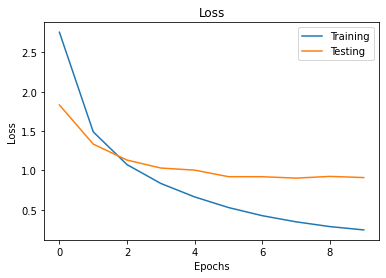

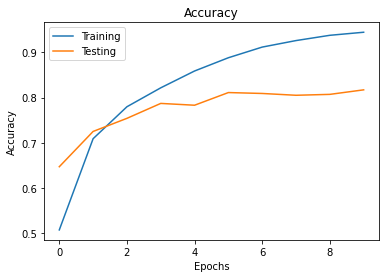

In [36]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(1)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Testing')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Testing')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluation on Test set

In [37]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 55us/sample - loss: 0.9889 - acc: 0.7934


[0.9889322577686259, 0.7934105]